In [4]:
%cd /content/drive/MyDrive/TA

/content/drive/MyDrive/TA


# Cài đặt một số thư viện

In [1]:
!pip install numpy
!pip install matplotlib
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Dưới đây là bài tập sử dụng thuật toán Linear Regression để dự đoán lượng khí CO2 thoát ra của các loại ô tô khác nhau, bằng cách:

- Điền vào dấu ... để hoàn thành bài tập.

- Thảo khảo bài tập Thầy Tùng đã chữa.

# Bài tập 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# load dataset bằng pandas
data = pd.read_csv('data.txt')
data.head(5)

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [19]:
# dựa vào bảng dữ liệu, ta sẽ trích xuất 2 thông tin Volume và Weight làm input
# CO2 làm output và convert chúng về dạng numpy để dễ dàng xử lí hơn
X = data[['Volume','Weight']].to_numpy()
Y = data['CO2'].to_numpy()
assert X.shape == (36,2), 'wrong input shape, please do it again'
assert Y.shape == (36,), 'wrong output shape, please do it again'
print('Feature shape: ', X.shape)
print('Target shape: ', Y.shape)

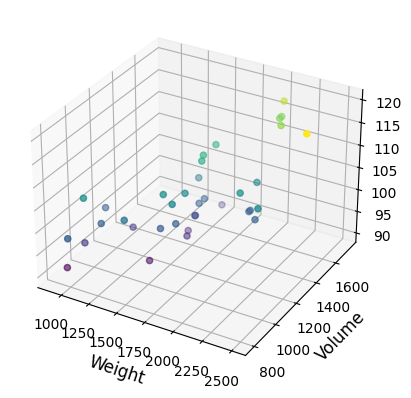

In [22]:
# trực quan hóa dữ liệu
fig = plt.figure()

ax = plt.axes(111,projection='3d')
ax.scatter3D(X[:,0], X[:,1], Y, c=Y)
plt.xlabel('Weight', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.show()

In [ ]:
# khởi tạo các tham sô (weight, bias)
def init_weights(X):
  W = np.random.uniform(0, 1, size=...)
  b = ...
  return W,b
W, b = init_weights(X)
assert X.shape[1] == W.shape[0], 'wrong init weights'

In [33]:
# khởi tạo các siêu tham số (hyper-parameters)
lr = 0.001
n_epochs = 1000

In [ ]:
# training mô hình
def train(X, Y, W, b, lr, n_epochs):
  m = ... # number of samples
  lost_lst = []
  for epoch in range(n_epochs):

    # forward pass
    Y_predict = np.dot(..., ...) + b
    diff = (Y_predict - Y)/1000000 # chia cho 1000000 vì giá trị quá lớn 

    # tính mse-loss
    mse = np.sum(diff ** 2)/m
    lost_lst.append(mse)

    # Update weights and bias
    W = W - lr * 2 * np.dot(..., ...) / m
    b = ...

    # Print the mean squared error every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: MSE = {mse}")
  return lost_lst, W, b

In [37]:
lost_lst, W, b = train(X,Y,W,b,lr,n_epochs)

In [ ]:
# trực quan hóa giá trị hàm MSE qua từng epochs
plt.plot(lost_lst)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('MSE', fontsize=15)
plt.show()

In [ ]:
# dự đoán giá trị mới
x_pred = np.array([[2300, 1300]])
y_pred = ...
print(y_pred)

# Note: Ở phía trên, việc chia giá trị hàm loss cho 1000000 chỉ là một trick để loại bỏ giá trị lớn của hàm loss. Thực tế, ta sẽ thường chuẩn hóa biến đầu vào và đầu ra về cùng một khoảng scale. Trong các bài phức tạp với dữ liệu đầu vào/ra lớn và nhiều, việc chuẩn hóa dữ liệu là bắt buộc để giúp mô hình có thể hội tụ. Đọc thêm [tại đây](https://www.atoti.io/articles/when-to-perform-a-feature-scaling/)